<a href="https://colab.research.google.com/github/amitjhirwal11/amitpro/blob/main/notebookbdcca21b18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import kagglehub
austinreese_craigslist_carstrucks_data_path = kagglehub.dataset_download('austinreese/craigslist-carstrucks-data')

print(austinreese_craigslist_carstrucks_data_path)


/root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Data Cleaning

In [6]:
df_path = '/root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10'
files = os.listdir(df_path)
print(files)

['vehicles.csv']


In [7]:
csv_f = 'vehicles.csv'
path = os.path.join(df_path, csv_f)
df = pd.read_csv(path)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
df.shape

(426880, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [11]:
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [12]:
Missing_values = df.isnull()
for column in Missing_values.columns.values.tolist():
    print(Missing_values[column].value_counts())
    print("")

id
False    426880
Name: count, dtype: int64

url
False    426880
Name: count, dtype: int64

region
False    426880
Name: count, dtype: int64

region_url
False    426880
Name: count, dtype: int64

price
False    426880
Name: count, dtype: int64

year
False    425675
True       1205
Name: count, dtype: int64

manufacturer
False    409234
True      17646
Name: count, dtype: int64

model
False    421603
True       5277
Name: count, dtype: int64

condition
False    252776
True     174104
Name: count, dtype: int64

cylinders
False    249202
True     177678
Name: count, dtype: int64

fuel
False    423867
True       3013
Name: count, dtype: int64

odometer
False    422480
True       4400
Name: count, dtype: int64

title_status
False    418638
True       8242
Name: count, dtype: int64

transmission
False    424324
True       2556
Name: count, dtype: int64

VIN
False    265838
True     161042
Name: count, dtype: int64

drive
False    296313
True     130567
Name: count, dtype: int64

size
True  

In [13]:
numeric_columns = ['year', 'odometer', 'lat', 'long']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [14]:
def fill_with_mode(column):
    if column.isna().all():
        return column.fillna('Unknown')
    else:
        mode_value = column.mode()[0]
        return column.fillna(mode_value)
columns_to_clean = categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']
for column in columns_to_clean:
    if column in df.columns:
        df[column].fillna(fill_with_mode(df[column]), inplace=True)

<ipython-input-14-75eca91ec07d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(fill_with_mode(df[column]), inplace=True)


In [15]:
df.drop(['region_url','image_url','description','county'],inplace=True,axis=1)

df['posting_date'] = df['posting_date'].fillna('Unknown')

In [16]:
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '-' * 20 + '\n')

id : 426880
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
Name: count, dtype: int64

--------------------

url : 426880
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html             1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html     1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html    1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html          1
Name: count, dtype: int64

--------------------

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

--------------------

price : 15655
price
0       32895
6995     3169
7995     3129
9995     2867
8995     2837
Name: 

In [17]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.438769,2.127764e+05,5.796551,18.224040
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,34.757016,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,8.660000e+04,39.064410,-89.028197
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,42.350000,-81.030000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [18]:
df.describe(include = 'all')

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
count,4.268800e+05,426880,426880,4.268800e+05,426880.000000,426880,426880,426880,426880,426880,...,426880,426880,426880,426880,426880,426880,426880,426880.000000,426880.000000,426880
unique,NaN,426880,404,NaN,NaN,42,29667,6,8,5,...,3,118264,3,4,13,12,51,NaN,NaN,381537
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca,NaN,NaN,Unknown
freq,NaN,1,3608,NaN,NaN,88631,13286,295560,271847,359222,...,339080,161303,262471,369826,179914,209488,50614,NaN,NaN,68
mean,7.311487e+09,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,1.218228e+07,9.438769,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.796551,18.224040,NaN
min,7.207408e+09,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.757016,-111.907973,NaN
50%,7.312621e+09,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.064410,-89.028197,NaN
75%,7.315254e+09,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.350000,-81.030000,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          426880 non-null  float64
 5   manufacturer  426880 non-null  object 
 6   model         426880 non-null  object 
 7   condition     426880 non-null  object 
 8   cylinders     426880 non-null  object 
 9   fuel          426880 non-null  object 
 10  odometer      426880 non-null  float64
 11  title_status  426880 non-null  object 
 12  transmission  426880 non-null  object 
 13  VIN           426880 non-null  object 
 14  drive         426880 non-null  object 
 15  size          426880 non-null  object 
 16  type          426880 non-null  object 
 17  paint_color   426880 non-null  object 
 18  stat

In [20]:
df.columns

Index(['id', 'url', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state',
       'lat', 'long', 'posting_date'],
      dtype='object')

In [21]:
df.duplicated().sum()

0

In [22]:
df.dtypes

,0
id,int64
url,object
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object


In [23]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

<ipython-input-23-0ba2479447c3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
<ipython-input-23-0ba2479447c3>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')


In [24]:
df.head()

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,6000,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,az,38.49394,-94.748599,NaT
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,11900,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ar,38.49394,-94.748599,NaT
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,21000,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,fl,38.49394,-94.748599,NaT
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,1500,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ma,38.49394,-94.748599,NaT
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,4900,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,nc,38.49394,-94.748599,NaT


In [25]:
df['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
,'other'],value=[3,4,5,6,8,10,12,np.nan],inplace=True)

<ipython-input-25-cb0408551b52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
<ipython-input-25-cb0408551b52>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

# EDA

## What is the most popular car type?

In [26]:
df['type'].value_counts()

,count
type,
sedan,179914
SUV,77284
pickup,43510
truck,35279
other,22110
coupe,19204
hatchback,16598
wagon,10751
van,8548


**We found sedan is the highest one.**

<ipython-input-27-7cc56b3c12f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_type_counts.values, y=car_type_counts.index, palette='viridis')


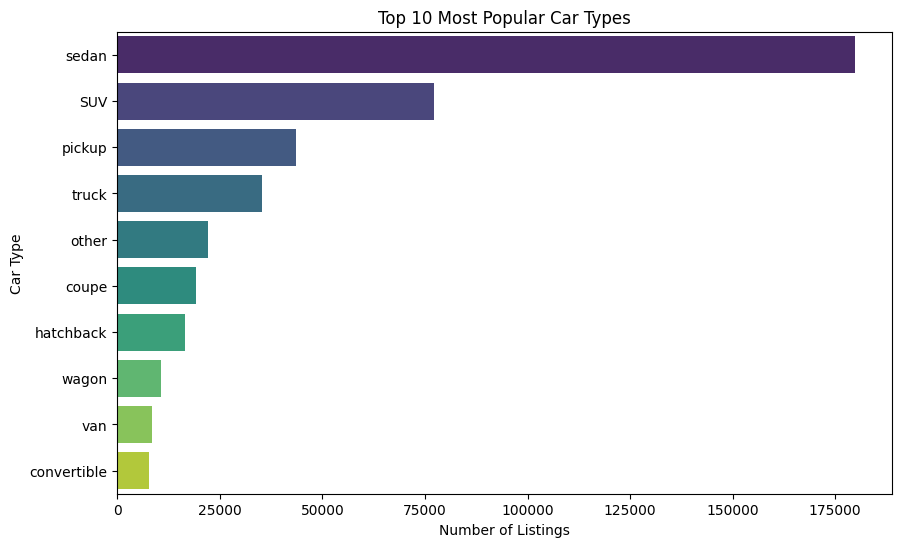

In [27]:
car_type_counts = df['type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.values, y=car_type_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Car Types')
plt.xlabel('Number of Listings')
plt.ylabel('Car Type')
plt.show()

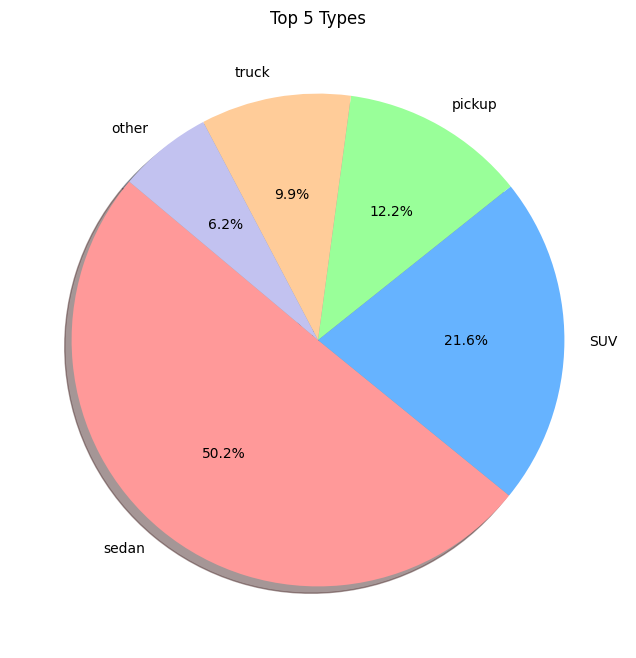

In [28]:
df['type'].value_counts().head(5).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    startangle=140,
    shadow=True,
    labels=df['type'].value_counts().head(5).index,  # Use specific labels
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Optional custom colors
)
plt.title('Top 5 Types')
plt.ylabel('')
plt.show()

## What is the distribution of cars according to title status?

<ipython-input-29-3a8a98356728>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='magma')


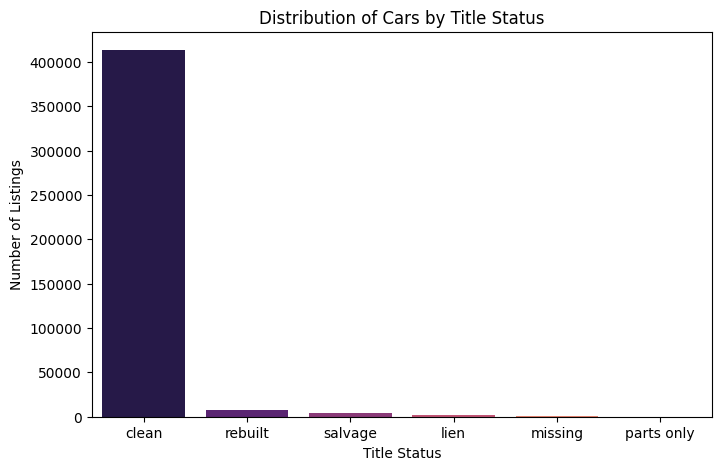

In [29]:
title_counts = df['title_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='magma')
plt.title('Distribution of Cars by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Number of Listings')
plt.show()


## What is the trend of data over time?

<ipython-input-30-e1067ba2ad23>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['posting_date'].dt.to_period('M')


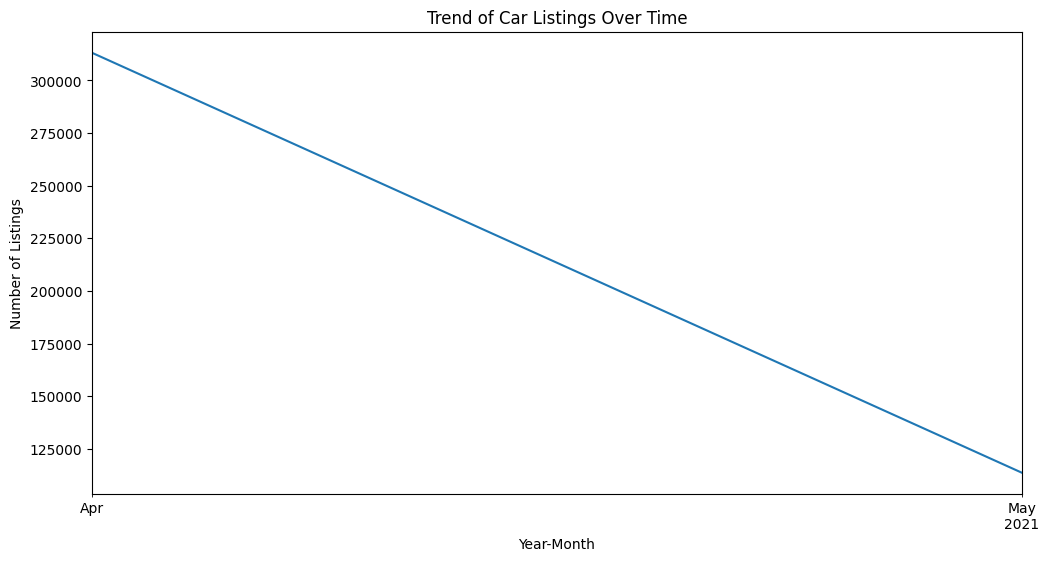

In [30]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['year_month'] = df['posting_date'].dt.to_period('M')
trend = df['year_month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
trend.plot()
plt.title('Trend of Car Listings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


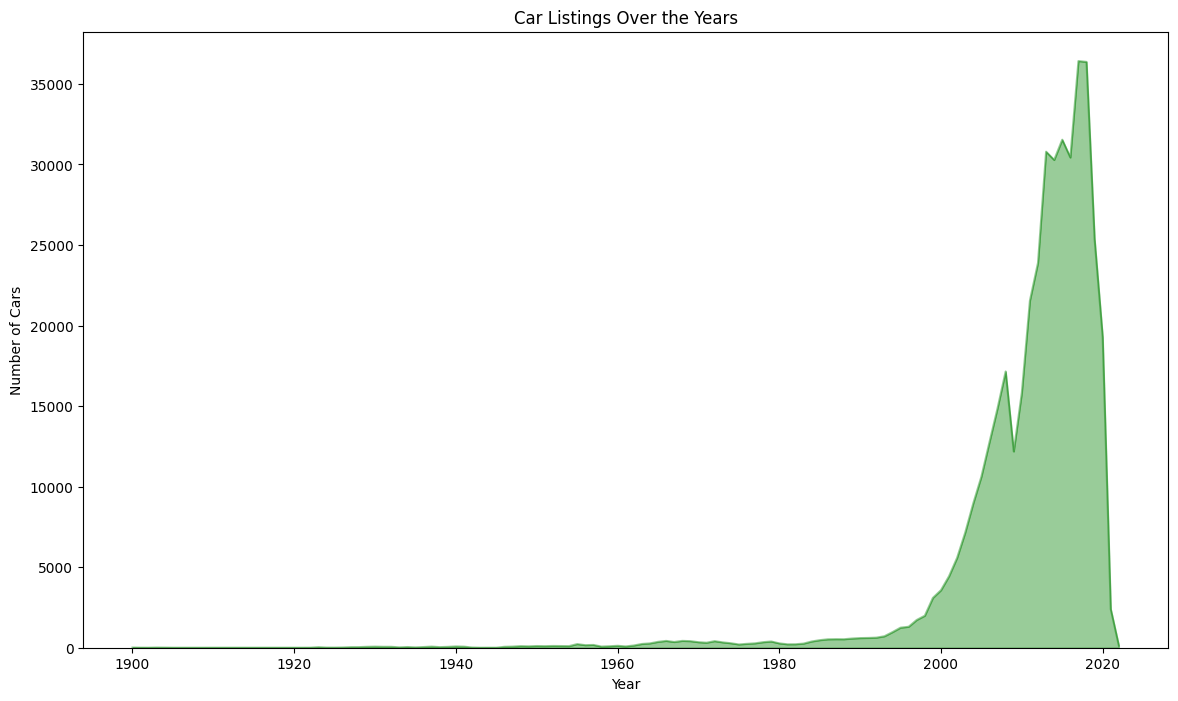

In [31]:
df['year'] = df['year'].astype(int)
yearly_distribution = df.groupby('year')['id'].count()
plt.figure(figsize=(14, 8))
yearly_distribution.plot(kind='area', color='green', alpha=0.4)
plt.title('Car Listings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

## How does the price change over the years?

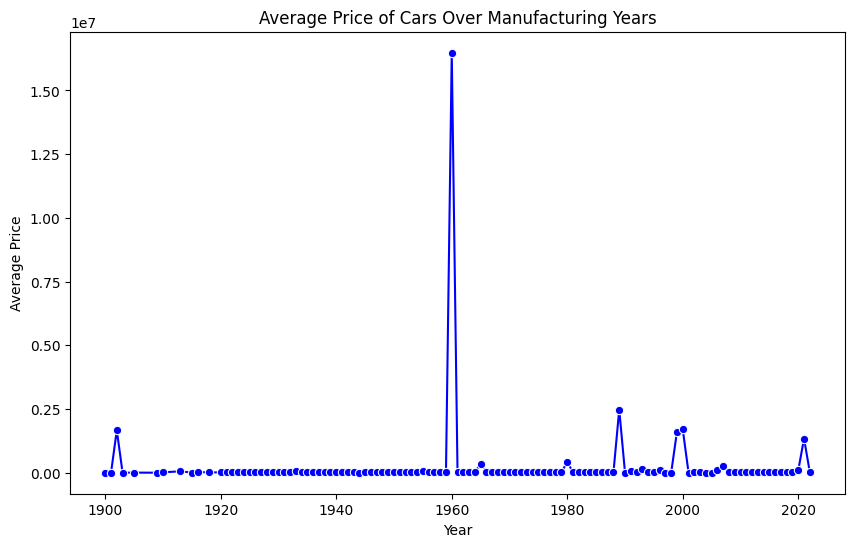

In [32]:
price_by_year = df.groupby('year')['price'].mean().dropna()
plt.figure(figsize=(10, 6))
sns.lineplot(x=price_by_year.index, y=price_by_year.values, marker='o', color='b')
plt.title('Average Price of Cars Over Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


## What is the most popular condition?

In [33]:
df['condition'].value_counts()

,count
condition,
good,295560
excellent,101467
like new,21178
fair,6769
new,1305
salvage,601


**we can see that the highest is good.**

In [ ]:
condition_counts = df['condition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='coolwarm')
plt.title('Distribution of Car Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Listings')
plt.show()


## What is the relation between price and mileage?

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()


## What is the correlation between price, distance, and cylinders?

In [ ]:
corr = df[['price', 'odometer', 'cylinders']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Price, Odometer, Cylinders')
plt.show()


## How is price affected by fuel type?

In [ ]:
fuel_price = df.groupby('fuel')['price'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_price.index, y=fuel_price.values, palette='pastel')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


## What is the average price based on manufacturer?

In [ ]:
manufacturer_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacturer_price.values, y=manufacturer_price.index, palette='cubehelix')
plt.title('Top 10 Manufacturers with Highest Average Price')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()


## What is the distribution of cars based on cylinders?

In [ ]:
df['cylinders'].value_counts().sort_values()


In [ ]:
cylinder_types = df['cylinders'].dropna().unique()
cylinder_types

In [ ]:
plt.figure(figsize=(20, 20))
for i, cyl in enumerate(cylinder_types, 1):
    plt.subplot(len(cylinder_types), 1, i)
    sns.distplot(
        df[df['cylinders'] == cyl]['price'],
        color='maroon',
        hist_kws={'alpha': 0.7},
        kde_kws={'lw': 5}
    )
    plt.title(f'Price distribution of {cyl}-cylinder cars', y=-0.5)
    plt.xlabel('Price')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
cylinder_counts = df['cylinders'].value_counts().dropna()
plt.figure(figsize=(8, 5))
sns.barplot(x=cylinder_counts.index, y=cylinder_counts.values, palette='viridis')
plt.title('Distribution of Cars by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Number of Listings')
plt.show()


## Which state has the most car models in the USA?

In [ ]:
stat=df.groupby('state').count()['model'].sort_values(ascending=False).head()
stat

In [ ]:
state_counts = df['state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='deep')
plt.title('Top 10 States with Most Car Listings')
plt.xlabel('Number of Listings')
plt.ylabel('State')
plt.show()


## Distribution on the map

In [ ]:
plt.figure(figsize = (20, 5))
sns.scatterplot(x=df['long'],y=df['lat'])
plt.title('Fig: Latitude and Longitude of each state', y=-0.23)

In [ ]:
sample_df = df.sample(int(0.01*len(df)))
lat_long_pairs = list(zip(list(df['lat']),list(df['long'])))

In [ ]:
map=folium.Map()
HeatMap(lat_long_pairs[50:150]).add_to(map)
map